## 1. Reading our dataset and importing libraries and modules required for exploratory data analysis.
### Data source link  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
## Short Descriptions of all the Features in the dataset:
<br>SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
<br>MSSubClass: The building class
<br>MSZoning: The general zoning classification
<br>LotFrontage: Linear feet of street connected to property
<br>LotArea: Lot size in square feet
<br>Street: Type of road access
<br>Alley: Type of alley access
<br>LotShape: General shape of property
<br>LandContour: Flatness of the property
<br>Utilities: Type of utilities available
<br>LotConfig: Lot configuration
<br>LandSlope: Slope of property
<br>Neighborhood: Physical locations within Ames city limits
<br>Condition1: Proximity to main road or railroad
<br>Condition2: Proximity to main road or railroad (if a second is present)
<br>BldgType: Type of dwelling
<br>HouseStyle: Style of dwelling
<br>OverallQual: Overall material and finish quality
<br>OverallCond: Overall condition rating
<br>YearBuilt: Original construction date
<br>YearRemodAdd: Remodel date
<br>RoofStyle: Type of roof
<br>RoofMatl: Roof material
<br>Exterior1st: Exterior covering on house
<br>Exterior2nd: Exterior covering on house (if more than one material)
<br>MasVnrType: Masonry veneer type
<br>MasVnrArea: Masonry veneer area in square feet
<br>ExterQual: Exterior material quality
<br>ExterCond: Present condition of the material on the exterior
<br>Foundation: Type of foundation
<br>BsmtQual: Height of the basement
<br>BsmtCond: General condition of the basement
<br>BsmtExposure: Walkout or garden level basement walls
<br>BsmtFinType1: Quality of basement finished area
<br>BsmtFinSF1: Type 1 finished square feet
<br>BsmtFinType2: Quality of second finished area (if present)
<br>BsmtFinSF2: Type 2 finished square feet
<br>BsmtUnfSF: Unfinished square feet of basement area
<br>TotalBsmtSF: Total square feet of basement area
<br>Heating: Type of heating
<br>HeatingQC: Heating quality and condition
<br>CentralAir: Central air conditioning
<br>Electrical: Electrical system
<br>1stFlrSF: First Floor square feet
<br>2ndFlrSF: Second floor square feet
<br>LowQualFinSF: Low quality finished square feet (all floors)
<br>GrLivArea: Above grade (ground) living area square feet
<br>BsmtFullBath: Basement full bathrooms
<br>BsmtHalfBath: Basement half bathrooms
<br>FullBath: Full bathrooms above grade
<br>HalfBath: Half baths above grade
<br>Bedroom: Number of bedrooms above basement level
<br>Kitchen: Number of kitchens
<br>KitchenQual: Kitchen quality
<br>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
<br>Functional: Home functionality rating
<br>Fireplaces: Number of fireplaces
<br>FireplaceQu: Fireplace quality
<br>GarageType: Garage location
<br>GarageYrBlt: Year garage was built
<br>GarageFinish: Interior finish of the garage
<br>GarageCars: Size of garage in car capacity
<br>GarageArea: Size of garage in square feet
<br>GarageQual: Garage quality
<br>GarageCond: Garage condition
<br>PavedDrive: Paved driveway
<br>WoodDeckSF: Wood deck area in square feet
<br>OpenPorchSF: Open porch area in square feet
<br>EnclosedPorch: Enclosed porch area in square feet
<br>3SsnPorch: Three season porch area in square feet
<br>ScreenPorch: Screen porch area in square feet
<br>PoolArea: Pool area in square feet
<br>PoolQC: Pool quality
<br>Fence: Fence quality
<br>MiscFeature: Miscellaneous feature not covered in other categories
<br>MiscVal: $Value of miscellaneous feature
<br>MoSold: Month Sold
<br>YrSold: Year Sold
<br>SaleType: Type of sale
<br>SaleCondition: Condition of sale

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy.stats import norm, skew
import os 

In [2]:
dataset=pd.read_csv('train.csv')
print('No of rows in dataset: {} \nNo of columns in dataset:{}  '.format(dataset.shape[0],dataset.shape[1]))
print(dataset.head().transpose())

No of rows in dataset: 1460 
No of columns in dataset:81  
                    0       1       2        3       4
Id                  1       2       3        4       5
MSSubClass         60      20      60       70      60
MSZoning           RL      RL      RL       RL      RL
LotFrontage      65.0    80.0    68.0     60.0    84.0
LotArea          8450    9600   11250     9550   14260
...               ...     ...     ...      ...     ...
MoSold              2       5       9        2      12
YrSold           2008    2007    2008     2006    2008
SaleType           WD      WD      WD       WD      WD
SaleCondition  Normal  Normal  Normal  Abnorml  Normal
SalePrice      208500  181500  223500   140000  250000

[81 rows x 5 columns]


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From the above info we can see that there are columns with far less non-null values while there should be 1460 supposed no of rows.

#### Finding percentage of NULL values in features for our dataset.

In [4]:
total=dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Top 6 features in the above table shows very high number of null values and hence those features can certainly be dropped from our dataset.

In [5]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Describe will only run on the features of numeric datatypes.

In [6]:
numeric_features = dataset.select_dtypes(include=[np.number])
print('No of numeric features in our dataset is: {}'.format(len(numeric_features.columns)))
numeric_features.columns

No of numeric features in our dataset is: 38


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## 1.1) Observations: 
1. There are 81 columns in our data set and SalePrice is our target variable.
2. Out of 81, 38 features are of numeric datatype which include int and float types

## 2) saleprice distribution plot 

C:\Users\ugunda\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180921.196 sigma = 79415.292



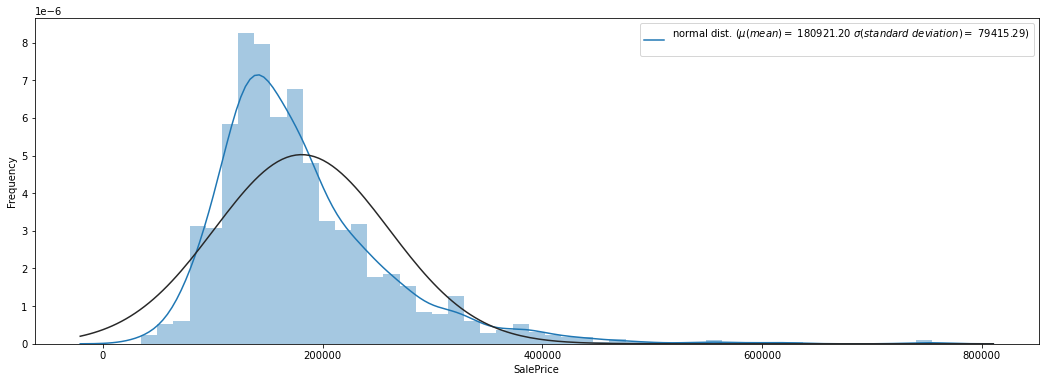

In [7]:
plt.figure(figsize=(18,6))
sns.distplot(dataset['SalePrice'] , fit=norm);#from import seaborn as sns
(mu,sigma)=norm.fit(dataset['SalePrice'])#to compute mu, sigma
print('\n mu = {:.3f} sigma = {:.3f}\n'.format(mu, sigma))
plt.legend(['normal dist. ($\mu(mean) =$ {:.2f} $\sigma(standard\ deviation) =$ {:.2f})\n'.format(mu, sigma)])
plt.ylabel('Frequency')
plt.xlabel('SalePrice')
plt.show()

From the above distplot, the 'SalePrice' is dense between 100k and 250k, but there are larger outliers on the right side, when the saleprices gets expensive.

## 3) saleprice QQ-plot(quantile-quantile plots) Scatter plot

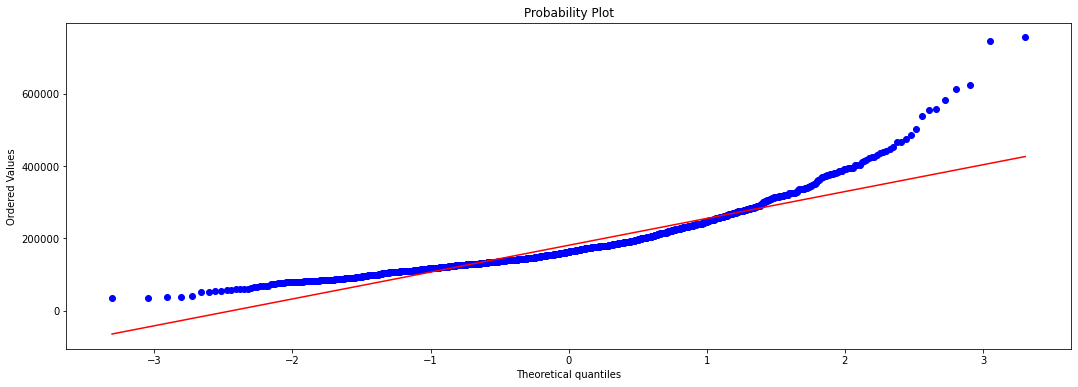

In [8]:
fig=plt.figure(figsize=(18,6))
stats.stats.probplot(dataset['SalePrice'],plot=plt)
plt.show()

## 4) Heatmap to show Correlations between features 
- Double tap on graph to show high resolution heatmap with clear labels.


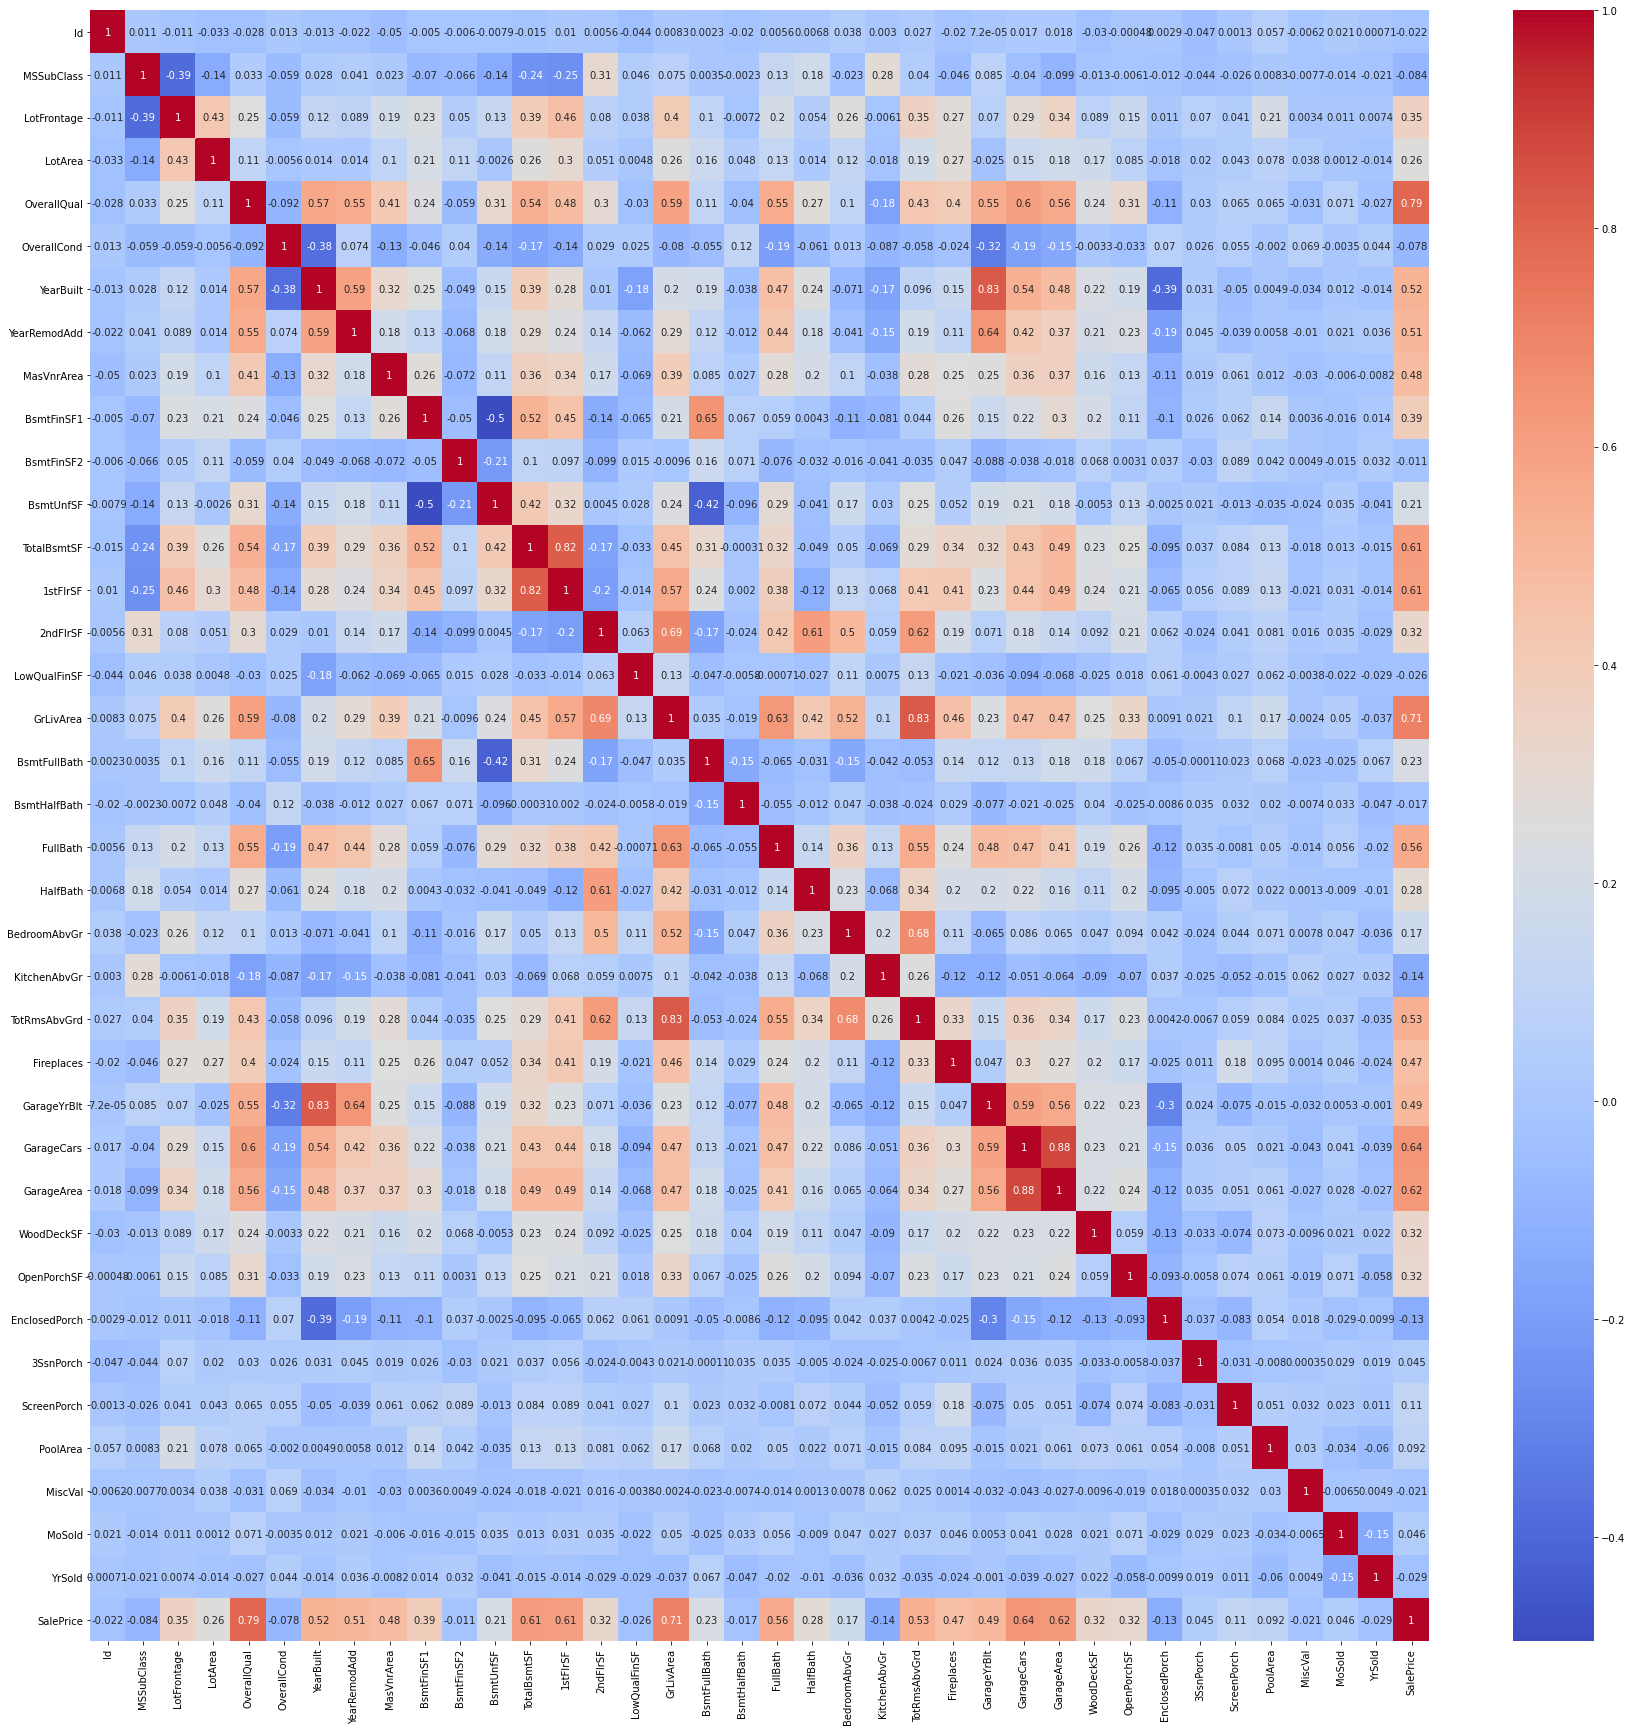

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)
plt.show()

### 4.1) Key observation from complete Correlation Heatmap

#### We can see that the following 6 features have better correlation with SalePrice
- OverallQual - 0.79
- TotalBsmtSF - 0.61
- 1stFlrSF    - 0.61
- GrLiveArea  - 0.71
- GarageCars  - 0.64
- GarageArea  - 0.62

## 5) The follwoing graphs to give more clarity  information about the 6 features identified before.
#### 5.1. Let’s try look at the greater living area (square feet) against the sale price:

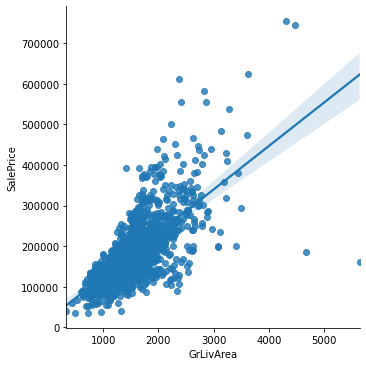

In [10]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=dataset)
plt.show()

5.1. Observation: Its generally expected that larger living area comes with higher price. This chart shows that is mostly true. But there are a couple of “cheap” houses with large living area.


#### 5.2. Now lets explore the “TotalBsmtSF”  — Total square feet of the basement area.

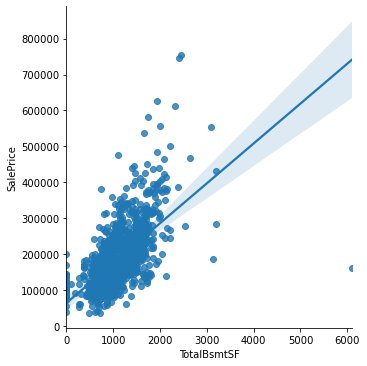

In [11]:
sns.lmplot(x='TotalBsmtSF',y='SalePrice',data=dataset)
plt.show()

5.2. Observation: We can see that basement area indeed may have good predictive power for our question.


#### 5.3. Now lets check “OverallQual” — overall material and finish quality. This one may be more subjective feature.

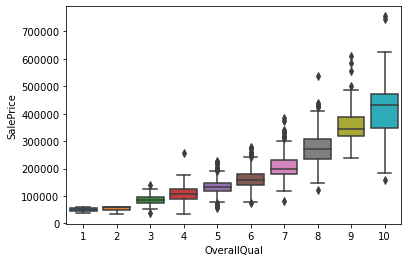

In [12]:
sns.boxplot(x='OverallQual',y='SalePrice',data=dataset)
plt.show()

5.3. Observation: We can see that OverallQual indeed have good predictive power for our question.


#### 5.4. Now lets check “1stFlrSF” — First Floor square feet. This one may be more subjective feature.

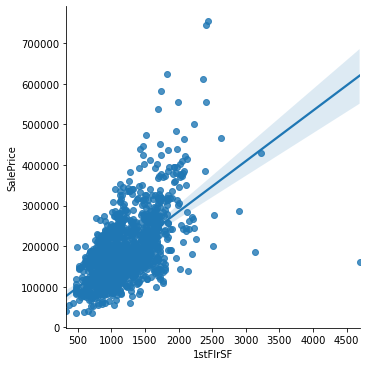

In [13]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=dataset)
plt.show()

5.4. Observation: Here SalePrice and 1stFlrSF got a correlation of 0.61 which could be a good factor for price prediction.

#### 5.5. Now lets check “GarageCars” — Size of garage in car capacity.

C:\Users\ugunda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


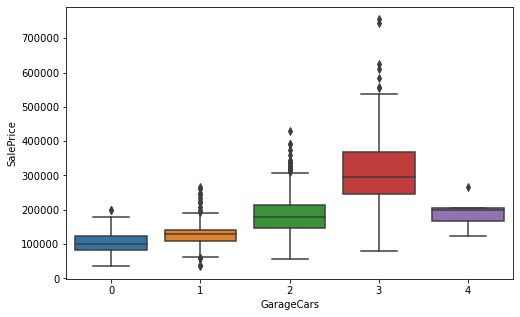

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot('GarageCars','SalePrice',data=dataset)
plt.show()

5.5. Observation: Here SalePrice and GarageCars got a correlation of 0.64 which could be a good factor for price prediction but though the garage capacity increased to '4', saleprice trend got inverted and has reduced. We have to be careful with this feature.

#### 5.6.  Now lets check “GarageArea” — size of garage in square feet.

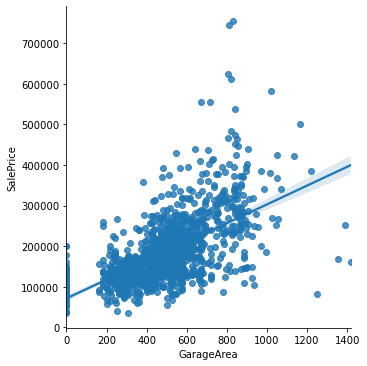

In [15]:
sns.lmplot(x='GarageArea',y='SalePrice',data=dataset)
plt.show()

5.6. Observation: Here SalePrice and GarageArea got a correlation of 0.62 which could be a good factor for price prediction but there are huge number of outliers can be seen in the scatter plot.


## 5. Identifying categorical features in our dataset
1. Catagorical features are the ones with type as 'object' in our dataset

In [16]:
categorical_cols = dataset.columns[dataset.dtypes==object].tolist()
dataset[categorical_cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


1. We can observe here that there are 43 catagorical features in our dataset.
2. As we observed that there are 38 numeric features previously and 43 catagorical features now which adds  to 81(43+38), hence it confirms the total no of features in our dataset.

In [17]:
''' 
Features comprising categorical variables can become quite computationally expensive for our models if there are high number 
of unique values hence the following code will neglect features with 10 or more unique values. 
'''
categorical_cols_with_fewer_unique_counts = [col_name for col_name in categorical_cols if
                    dataset[col_name].nunique()<10]
print(' Number of categorical features now is : {}'.format(len(categorical_cols_with_fewer_unique_counts)))
categorical_cols_with_fewer_unique_counts

 Number of categorical features now is : 40


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## 6. This may concludes our exploratory data analysis with the follwing heatmap with the top 10 most correlated features with our target variable 'saleprice'.

Top 15 features are:
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')


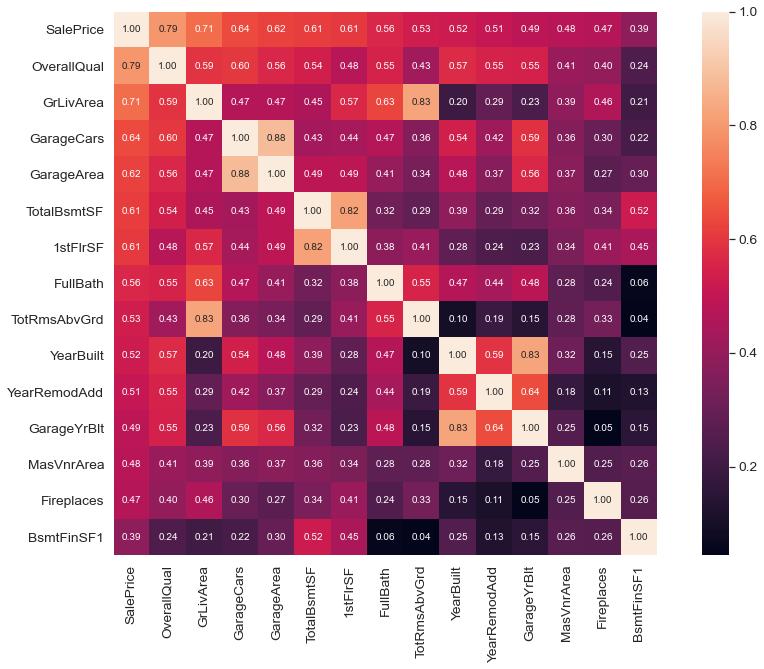

In [18]:
plt.figure(figsize=(16,10))
top_n_features=15
cols=dataset.corr().nlargest(top_n_features,'SalePrice')['SalePrice'].index #picking top 10 correlated features 
print(f'Top {top_n_features} features are:\n {cols}')
sns.set(font_scale=1.25)
hmap=sns.heatmap(dataset[cols].corr(),cbar=True,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 6.1) Key observations from Final Correlation Heatmap

1. We can see the following 6 features have relatively better correlation with SalePrice among the top 10 with more than 0.5 correlation as we have already seen above in part 4.1 of our notebook but we can made a few following observations and can certainly remove some features from our dataset without effecting the outcome of the prediction.
- OverallQual
- TotalBsmtSF
- 1stFlrSF
- GrLiveArea
- GarageCars
- GarageArea 

2. With the help of identifying the features with better correlation, we can identify features that impact the SalesPrices the most.

3. While 'GarageCars' and 'GarageArea' also have strong correlation, but they are mostly mutually dependent i.e. they are NOT linearly independent of each other, i.e. there is a high-multicollinearity (0.88 as we can see in the figure) between them. Because, the number of cars that fit into the garage is dependent of the garage area. Hence, we just need one of these variables in our analysis (we can decide to keep 'GarageCars' as its correlation with 'SalePrice' is higher).

4. Similar mutual dependence applies to the two features 'TotalBsmtSF' and '1stFloor' with 0.82 correlation. We can take only one among 'TotalBsmtSF' and '1stFloor' in our feature-engineering.

5. Similar mutual dependence also applies to the two features 'TotRmsAbvGrd' and 'GrLivArea' with 0.83 correlation. We can take only one among 'TotRmsAbvGrd' and 'GrLivArea' in our feature-engineering.

6. Reduction in mutual dependence features will result in reduction of computational cost while applying machine learning.